In [46]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition


In [47]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [48]:
dtf = pd.read_csv('/content/drive/MyDrive/GymData/gym_members_exercise_tracking.csv')
dtf.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


**Age**                         возраст    
**Gender**                       пол  
**Weight (kg)**	                вес   
**Height (m)**	                 рост   
**Max_BPM**                макс. сердцебиение    
**Avg_BPM**                  сред. сердцебиение    
**Resting_BPM**               сердцебиение в покое     
**Session_Duration (hours)**	   длительность занятия      
**Calories_Burned**            ккал сожжено    
**Workout_Type**             вид спорта    
**Fat_Percentage**	           процент жира          
**Water_Intake (liters)**          объем выпитой воды  
**Workout_Frequency (days/week)**	    частота занятий спортом     
**Experience_Level**              уровень опыта            
**BMI**                          индекс массы тела      

In [49]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [50]:
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

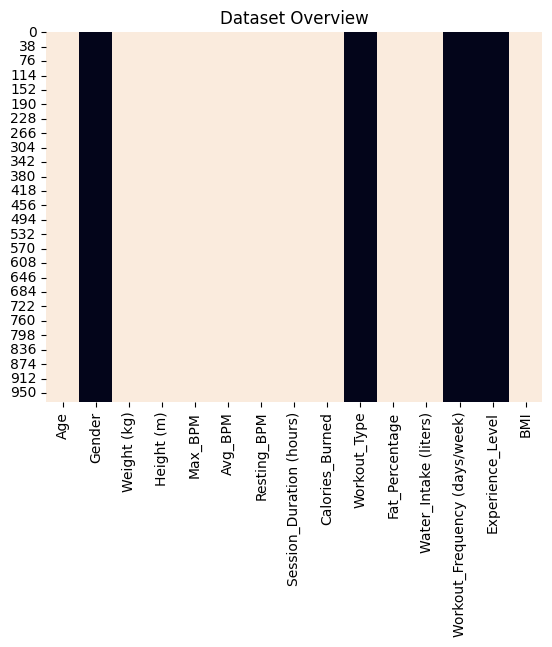

 Categerocial   Numeric   NaN 


In [51]:
dic_cols = {col:utils_recognize_type(dtf, col, max_cat=20) for col in dtf.columns}
heatmap = dtf.isnull()
for k,v in dic_cols.items():
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)

sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')

plt.show()

print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

Категориальные признаки: Weight, Workout_Type, Workout_Frequency, Experience_Level

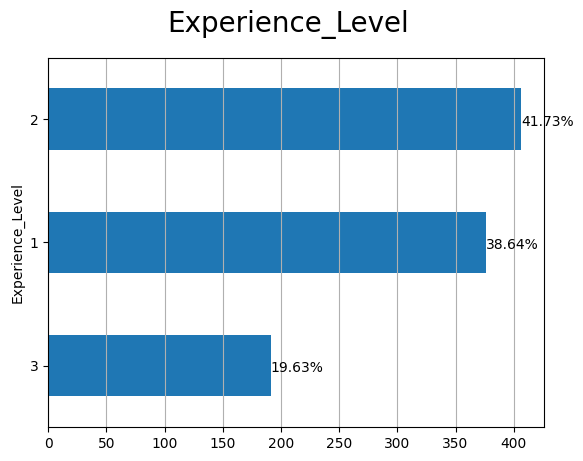

In [52]:
y ='Experience_Level'

ax = dtf[y].value_counts().sort_values().plot(kind="barh")

totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.20,
            str(round((i.get_width()/total)*100, 2))+'%',
            fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)

plt.show()

классы не сбалансированные

In [53]:
min_count = dtf['Experience_Level'].value_counts().min()
cl1 = dtf[dtf['Experience_Level'] == 1].sample(min_count, random_state=15)
cl2 = dtf[dtf['Experience_Level'] == 2].sample(min_count, random_state=15)
cl3 = dtf[dtf['Experience_Level'] == 3].sample(min_count, random_state=15)
dtf = pd.concat([cl1, cl2, cl3])

<ipython-input-54-dc91d7e2daf8>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])#зададим данные для графика
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


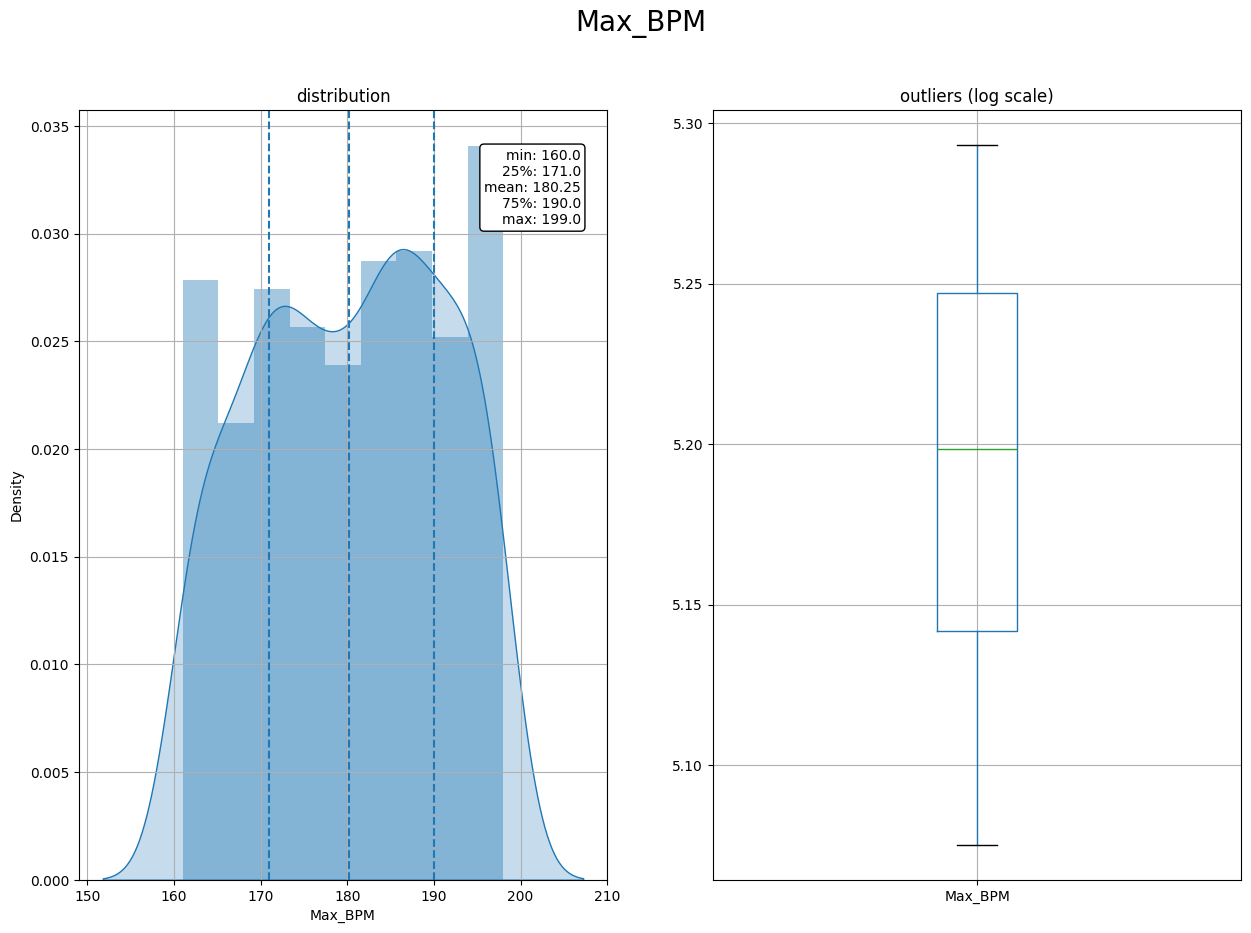

In [54]:
x="Max_BPM"

fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False, figsize=(15, 10))
fig.suptitle(x, fontsize=20)#задаем заголовок основного рисунка

### distribution
ax[0].title.set_text('distribution')#задаем название
variable = dtf[x].fillna(dtf[x].mean())#замена отсутствующих значений в датафрейме на средние
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))#вычисляем q-й квантиль заданных данных вдоль указанной оси.
variable = variable[ (variable > breaks[0]) & (variable <
                                               breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])#зададим данные для графика
des = dtf[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

ax[1].title.set_text('outliers (log scale)')#устанавливаем заголовок
tmp_dtf = pd.DataFrame(dtf[x])
tmp_dtf[x] = np.log(tmp_dtf[x])
tmp_dtf.boxplot(column=x, ax=ax[1])

plt.show()

In [55]:
def show_dist(x, dtf):
    '''
    :param x: название столбца
    :param dtf: датасет
    :return: ничего не возвращает
    '''
    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(15, 10))
    fig.suptitle(x, fontsize=20)
    ### distribution
    ax[0].title.set_text('distribution')
    variable = dtf[x].fillna(dtf[x].mean())
    breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
    variable = variable[(variable > breaks[0]) & (variable <
                                                  breaks[10])]
    sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True},
                 ax=ax[0])  #Запишем чтобы создать горизонтальную гистограмму
    des = dtf[x].describe()

    ax[0].axvline(des["25%"], ls='--')
    ax[0].axvline(des["mean"], ls='--')
    ax[0].axvline(des["75%"], ls='--')
    ax[0].grid(True)
    des = round(des, 2).apply(lambda x: str(x))
    box = '\n'.join(
        ("min: " + des["min"], "25%: " + des["25%"], "mean: " + des["mean"], "75%: " + des["75%"], "max: " + des["max"]))
    ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right",
               bbox=dict(boxstyle='round', facecolor='white', alpha=1))

    ### boxplot
    ax[1].title.set_text('outliers (log scale)')  #устанавливаем заголовок
    tmp_dtf = pd.DataFrame(dtf[x])
    tmp_dtf[x] = np.log(tmp_dtf[x])
    tmp_dtf.boxplot(column=x, ax=ax[1])

    plt.show()

<ipython-input-55-750cfeea9a46>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True},
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


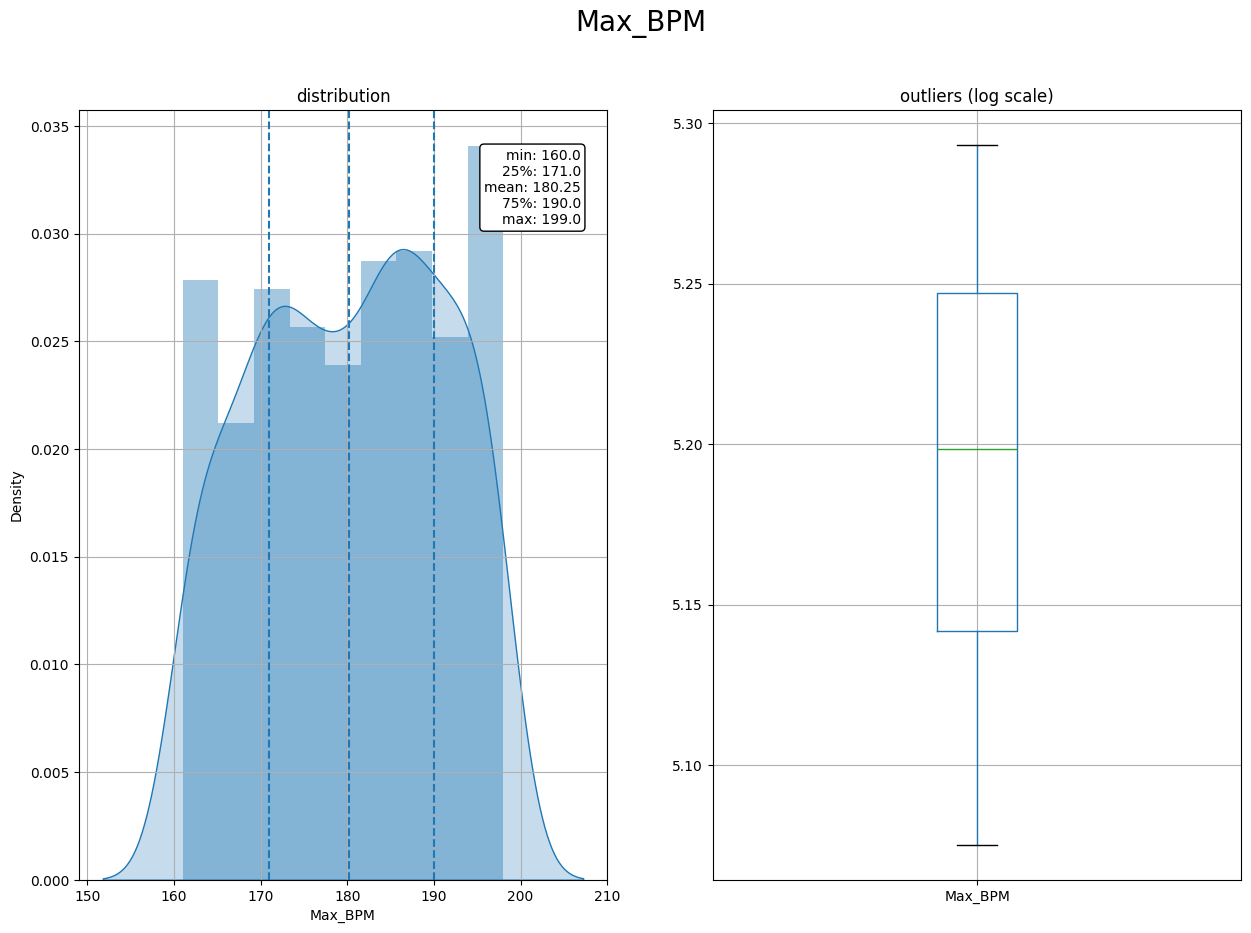

In [56]:
show_dist('Max_BPM', dtf)

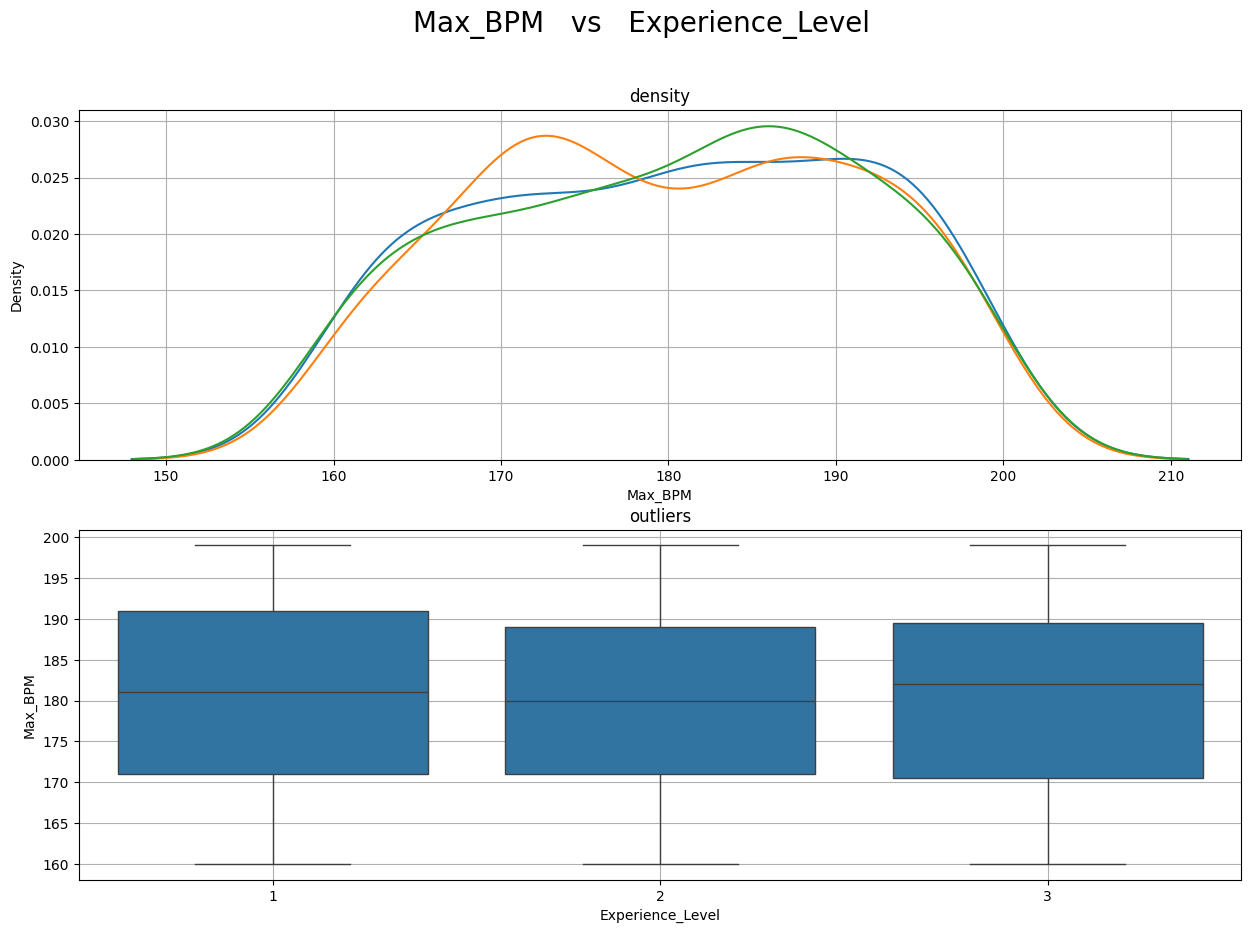

In [57]:
cat, num = "Experience_Level", "Max_BPM"
fig, ax = plt.subplots(nrows=2, ncols=1,  sharex=False, sharey=False, figsize=(15, 10))# распаковываем  кортеж в переменные figи ax.
fig.suptitle(x+"   vs   "+y, fontsize=20)# получаем объект рисунка и массив подграфиков,где первое число - количество строк,второе - столбцов, sharex, sharey задают нужно ли разделять ось между подграфиками


### distribution
ax[0].title.set_text('density')
for i in dtf[cat].unique():  # перебираем все уникальные значения в столбце dtf[cat], cat="Class"
    sns.kdeplot(dtf[dtf[cat]==i][num],   label=i, ax=ax[0])#Построим график плотности распределения в столбце num, при условии, что значение в столбце dtf[cat] совпадет с i
ax[0].grid(True)#Настроим линии сетки.

### boxplot
ax[1].title.set_text('outliers')#устанавливаем заголовок
sns.boxplot(x=cat, y=num, data=dtf, ax=ax[1])#Нарисуем блочную диаграмму, чтобы показать распределения по категориям.


ax[1].grid(True)#Настроим линии сетки.

plt.show()

In [58]:
def prep(df):
    df.loc[df.Workout_Type == 'Cardio', 'Workout_Type_ind'] = 0
    df.loc[df.Workout_Type == 'Strength', 'Workout_Type_ind'] = 1
    df.loc[df.Workout_Type == 'Yoga', 'Workout_Type_ind'] = 2
    df.loc[df.Workout_Type == 'HIIT', 'Workout_Type_ind'] = 3

    df.loc[df.Gender == 'Male', 'Gender_g'] = 0
    df.loc[df.Gender == 'Female', 'Gender_g'] = 1

    df.rename(inplace=True, columns={
        "Workout_Frequency (days/week)" : "Workout_Freq",
        "Water_Intake (liters)" : "Water_In",
        "Session_Duration (hours)" : "Session_Duration",
        "Height (m)" : "Height",
        "Weight (kg)":"Weight"
        })

    emdf = df.dropna(axis=0, how='any', inplace=False)#Удалм пропущенные значения
    return  emdf


In [59]:
dtf_tr, dtf_t = model_selection.train_test_split(dtf, test_size=0.3)

# подготавливаем данные в трейне и тесте одинаково
dtf_train = prep(dtf_tr)
dtf_test = prep(dtf_t)

## print info
print("X_train shape:", dtf_train.drop("Experience_Level",axis=1).shape, "| X_test shape:", dtf_test.drop("Experience_Level",axis=1).shape)
print("y_train mean:", round(np.mean(dtf_train["Experience_Level"]),2), "| y_test mean:", round(np.mean(dtf_test["Experience_Level"]),2))
print(dtf_train.drop("Experience_Level",axis=1).shape[1], "features:", dtf_train.drop("Experience_Level",axis=1).columns.to_list())

X_train shape: (401, 16) | X_test shape: (172, 16)
y_train mean: 2.01 | y_test mean: 1.97
16 features: ['Age', 'Gender', 'Weight', 'Height', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_In', 'Workout_Freq', 'BMI', 'Workout_Type_ind', 'Gender_g']


In [60]:
dtf_train.shape

(401, 17)

In [61]:
# формируем вспомогательный датасет (где все нужные фичи(столбцы), и нет целевой переменной) и series с целевой переменной. Для трейна
train_x = dtf_train[['Age', 'Weight', 'Height', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration', 'Calories_Burned', 'Fat_Percentage', 'Water_In', 'Workout_Freq', 'Workout_Type_ind', 'BMI', 'Gender_g']]
train_y = dtf_train['Experience_Level']

In [62]:
# формируем вспомогательный датасет (где все нужные фичи(столбцы), и нет целевой переменной) и series с целевой переменной. Для теста

test_x = dtf_test[['Age', 'Weight', 'Height', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration', 'Calories_Burned', 'Fat_Percentage', 'Water_In', 'Workout_Freq', 'Workout_Type_ind', 'BMI', 'Gender_g']]
test_y = dtf_test['Experience_Level']

In [63]:
Y = 'Experience_Level'

scaler = preprocessing.MinMaxScaler(feature_range=(0,1))#приведем Числовые переменные (Numeric Variable) к диапазону от 0 до 1.

X = scaler.fit_transform(train_x) #преобразуем данные таким образом, что их распределение будет иметь среднее значение 0 и стандартное отклонение 1.

train_x_scaled = pd.DataFrame(X, columns=train_x.columns,index=train_x.index )
train_y_scaled = train_y

train_x_scaled.head()# выводим



,Age,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Fat_Percentage,Water_In,Workout_Freq,Workout_Type_ind,BMI,Gender_g
575,0.219512,0.148064,0.16,0.153846,0.448980,0.500000,0.503356,0.380321,0.979920,0.136364,0.666667,0.000000,0.244203,1.0
548,0.390244,0.323462,0.00,0.820513,0.244898,0.458333,0.577181,0.386602,0.947791,0.272727,0.666667,0.000000,0.513355,1.0
924,0.000000,0.895216,0.28,0.717949,0.285714,0.708333,0.288591,0.239358,0.622490,0.545455,0.333333,0.000000,0.915468,0.0
708,0.341463,0.501139,0.48,0.897436,0.142857,0.541667,0.630872,0.462666,0.630522,0.272727,0.333333,0.333333,0.435280,0.0
437,0.219512,0.205011,0.58,0.102564,0.469388,0.958333,0.590604,0.449407,0.682731,0.000000,0.000000,0.000000,0.152333,1.0


<ipython-input-55-750cfeea9a46>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True},
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


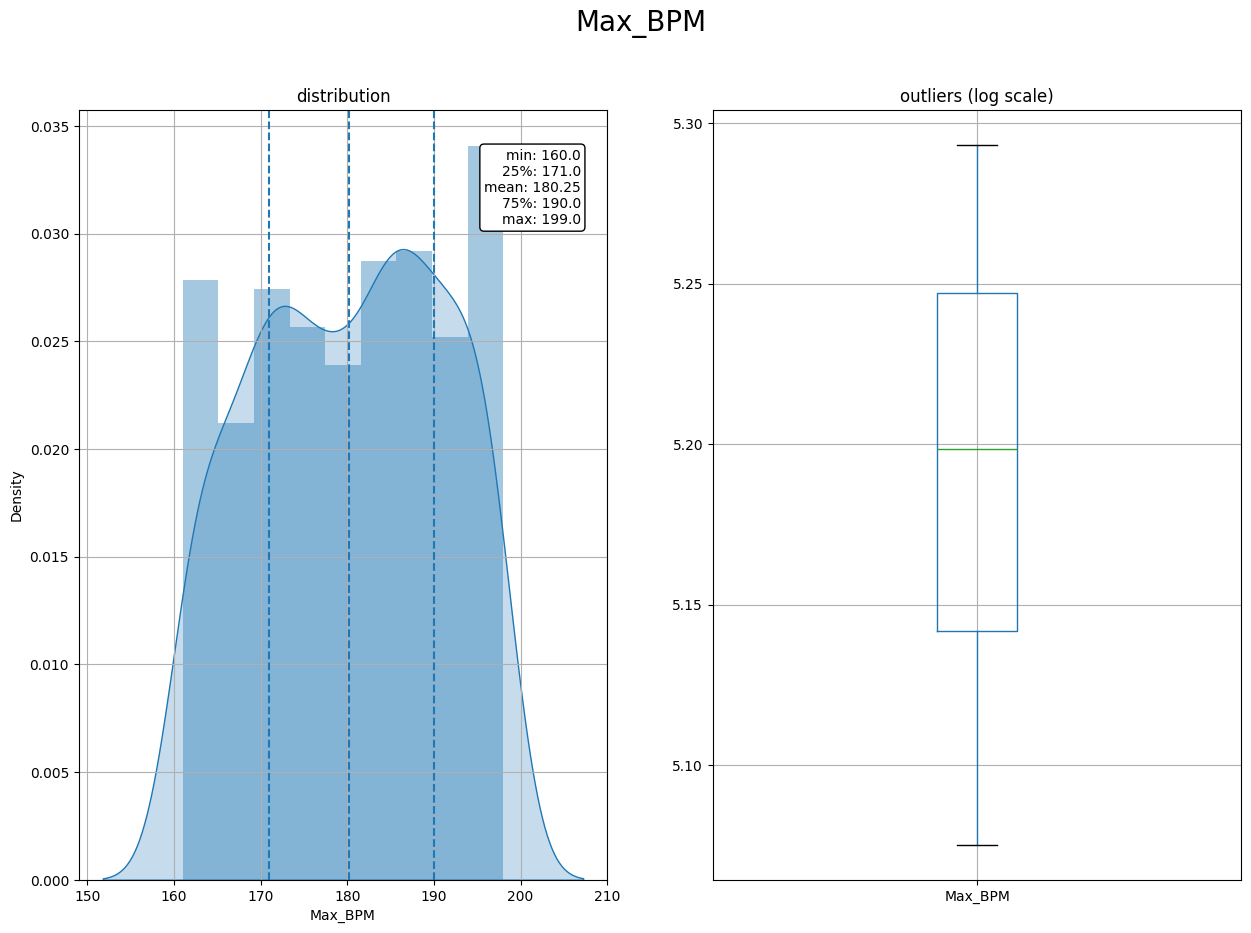

In [64]:
show_dist('Max_BPM', dtf) #используем ранее созданную нами функцию для отрисовки графиков

<ipython-input-55-750cfeea9a46>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True},
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


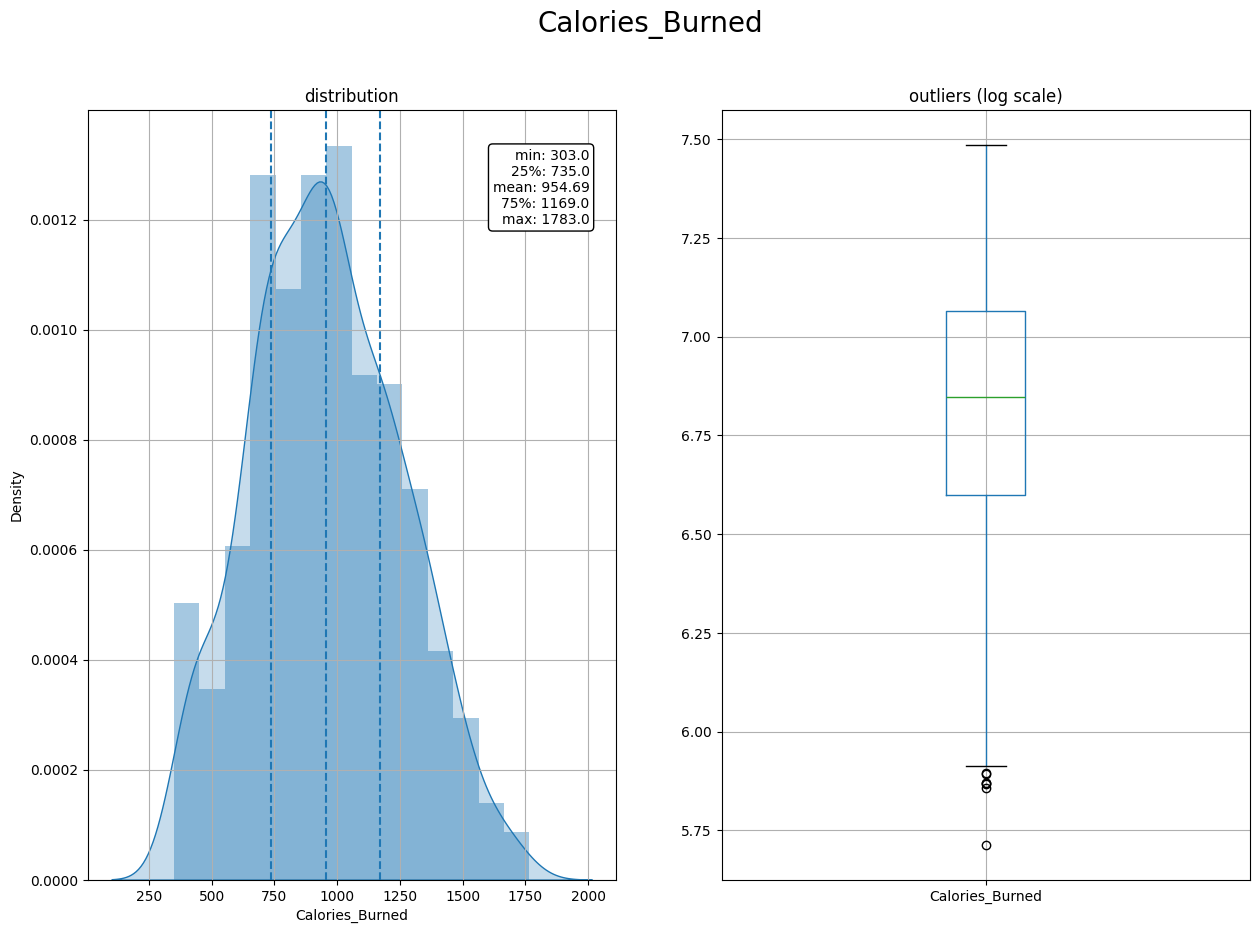

In [65]:
show_dist('Calories_Burned', dtf) #используем ранее созданную нами функцию для отрисовки графиков

In [66]:
X

array([[0.2195122 , 0.14806378, 0.16      , ..., 0.        , 0.24420311,
        1.        ],
       [0.3902439 , 0.32346241, 0.        , ..., 0.        , 0.51335486,
        1.        ],
       [0.        , 0.8952164 , 0.28      , ..., 0.        , 0.91546815,
        0.        ],
       ...,
       [0.17073171, 0.28929385, 0.54      , ..., 0.        , 0.23393014,
        1.        ],
       [0.6097561 , 0.37813212, 0.76      , ..., 0.        , 0.22894042,
        0.        ],
       [0.87804878, 0.49658314, 0.72      , ..., 1.        , 0.33020252,
        0.        ]])

In [67]:
train_x.index

Index([575, 548, 924, 708, 437, 928, 516, 534, 727, 400,
       ...
       395, 876, 955, 498,   7, 877, 517,  67, 337, 181],
      dtype='int64', length=401)

In [68]:
X = scaler.fit_transform(test_x)

test_x_scaled = pd.DataFrame(X, columns=test_x.columns,index=test_x.index )
test_y_scaled = test_y

Text(0.5, 1.0, 'pearson correlation')

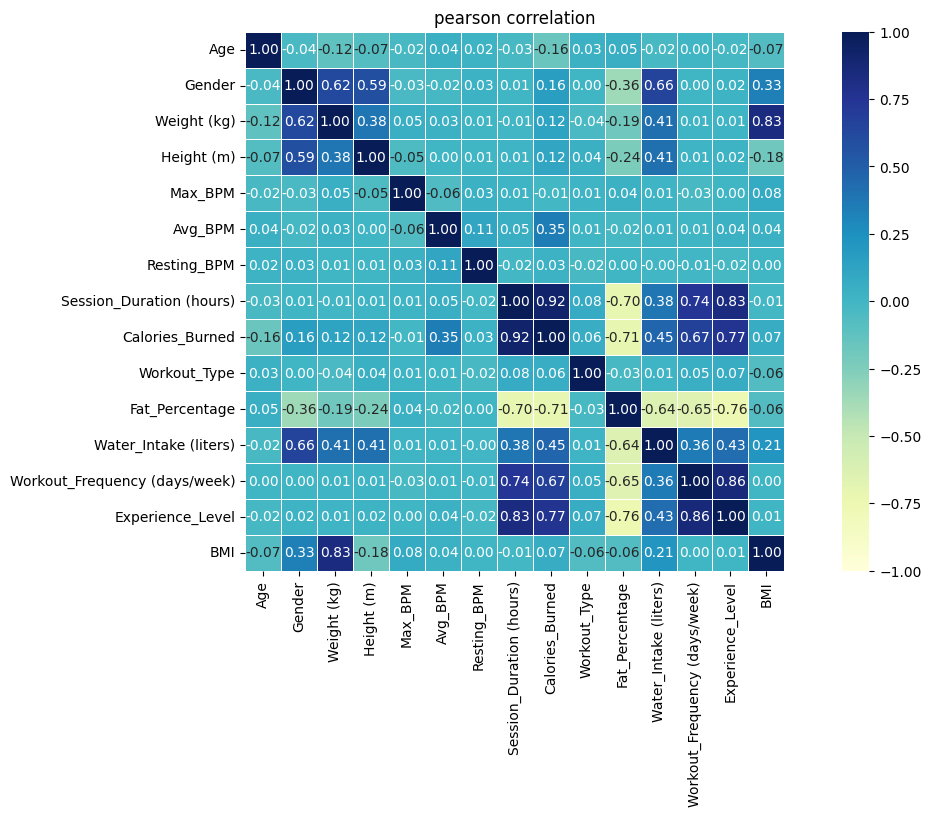

In [69]:
corr_matrix = dtf.copy()
plt.figure(figsize=(15,7),dpi=100)

for col in corr_matrix.columns: #зададим условия для столбцов
  if corr_matrix[col].dtype == "O":
        corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]

corr_matrix = corr_matrix.corr(method="pearson",numeric_only = True)

sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, square=True)
plt.title("pearson correlation")

Целевая переменная Experience_Level имеет наибольшую зависимость от переменных: Workout_Frequency (коэф-т корелляции Пирсона 0.86), Session_Duration (0.83), Calories_Burned(0.77), Fat_Percentage(-0.76), Water_Intake(0.43)

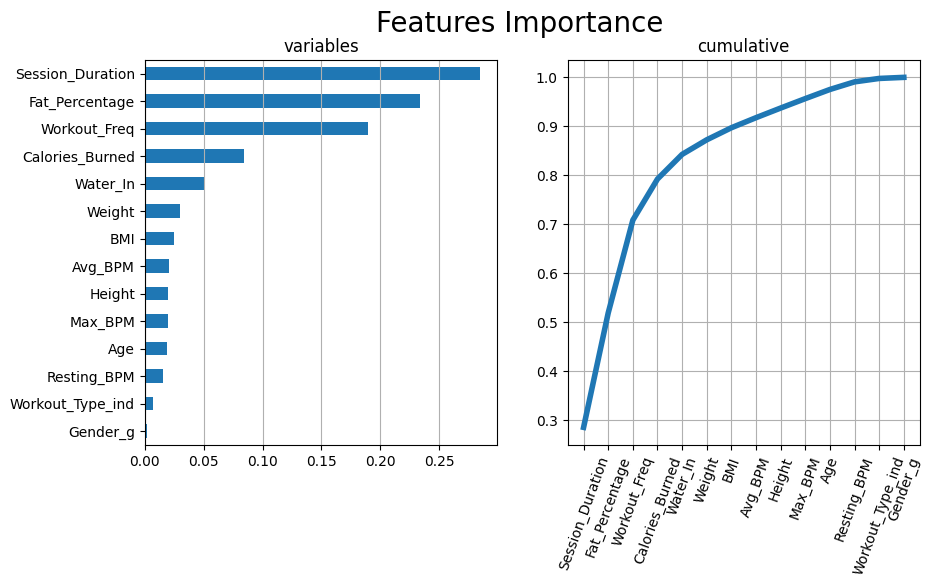

In [70]:
X = train_x_scaled.values
y = train_y_scaled.values

feature_names = train_x_scaled.columns.tolist()# имена столбцов в data.

## Importance
model = ensemble.RandomForestClassifier(n_estimators=100,
                                        criterion="entropy", random_state=0)
model.fit(X,y)

importances = model.feature_importances_ #это оценка, присваиваемая функциям модели машинного обучения,которая определяет, насколько «важной» является функция для прогноза модели.

## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances,
                                "VARIABLE":feature_names}).sort_values("IMPORTANCE",
                                                                       ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")


## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False,figsize=(10,5),dpi=100)# распаковываем  кортеж в переменные figи ax.
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')# подпишем график
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
    kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')# подпишем график
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4,
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)),
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')#Настроим линии сетки.

plt.show()

наиболее важными оказались параметры Session_Duration, Fat_Percentage, Workout_Freq, Calories_Burned и Water_In

In [71]:
X_train = train_x_scaled[['Session_Duration', 'Fat_Percentage', 'Workout_Freq', 'Calories_Burned', 'Water_In']]
y_train = train_y_scaled

X_test = test_x_scaled[['Session_Duration', 'Fat_Percentage', 'Workout_Freq', 'Calories_Burned', 'Water_In']]
y_test = test_y_scaled

In [72]:
model = ensemble.GradientBoostingClassifier()


param_dic = {'learning_rate':[0.15,0.1,0.05],     #весовой коэффициент для поправок по новым деревьям при добавлении в модель
             'n_estimators':[100,250,500],  #количество деревьев, добавленных в модель
             'max_depth':[2,3,4,5],    #максимальная глубина дерева
             'min_samples_split':[2,4,6],    #задает минимальное количество выборок для разделения
             'min_samples_leaf':[1,3,5],     #минимальное количество выборок для формирования листа
             'max_features':[2,3,4],     #квадратный корень из функций обычно является хорошей отправной точкой
             'subsample':[0.7,0.8,0.9,1]}       #образцы, которые будут использоваться для подгонки индивидуального базового файла

## random search(Рандомизированный поиск по гиперпараметрам.)
random_search = model_selection.RandomizedSearchCV(model,
                                                   param_distributions=param_dic, n_iter=10,
                                                   scoring="accuracy").fit(X_train, y_train)
print("Best Model parameters:", random_search.best_params_)
print("Best Model mean accuracy:", random_search.best_score_)
model = random_search.best_estimator_   # здесь теперь хранятся параметры, при которых были получены наилучшие метрики на трейне

Best Model parameters: {'subsample': 0.7, 'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 3, 'max_depth': 4, 'learning_rate': 0.05}
Best Model mean accuracy: 0.8927777777777779


In [73]:
model.fit(X_train, y_train)

predicted_prob = model.predict_proba(X_test) #прогнозирование

predicted = model.predict(X_test)

In [74]:
# а это истинное значение, кто к какому классу относится
y_test.values

array([3, 2, 1, 3, 2, 3, 1, 2, 2, 2, 3, 3, 2, 2, 3, 2, 1, 1, 3, 3, 2, 2,
       1, 3, 1, 1, 3, 2, 1, 3, 1, 1, 3, 1, 2, 1, 2, 1, 3, 1, 2, 3, 1, 3,
       1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 2, 3, 2, 2, 2, 2, 1, 1, 2,
       1, 3, 2, 1, 2, 2, 3, 1, 2, 3, 3, 1, 1, 1, 3, 1, 3, 2, 2, 3, 3, 1,
       2, 3, 2, 1, 2, 2, 3, 3, 1, 3, 1, 3, 1, 2, 3, 3, 3, 1, 2, 2, 1, 3,
       3, 1, 3, 1, 2, 3, 1, 2, 2, 1, 3, 3, 2, 2, 3, 3, 3, 2, 1, 3, 1, 3,
       1, 3, 1, 2, 2, 2, 2, 1, 3, 1, 1, 2, 1, 3, 3, 2, 2, 1])

In [75]:
accuracy = metrics.accuracy_score(y_test, predicted)#Оценим точность классификации.

auc = metrics.roc_auc_score(y_test, predicted_prob,  multi_class='ovo',average= "weighted") #возвращаем долю правильно классифицированных выборок.
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))

## Precision & Recall
recall = metrics.recall_score(y_test, predicted, average="weighted")
precision = metrics.precision_score(y_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy (overall correct predictions): 0.92
Auc: 0.98
Recall (all 1s predicted right): 0.92
Precision (confidence when predicting a 1): 0.92
Detail:
              precision    recall  f1-score   support

           1       0.94      0.82      0.88        60
           2       0.83      0.95      0.89        58
           3       1.00      1.00      1.00        54

    accuracy                           0.92       172
   macro avg       0.93      0.92      0.92       172
weighted avg       0.92      0.92      0.92       172



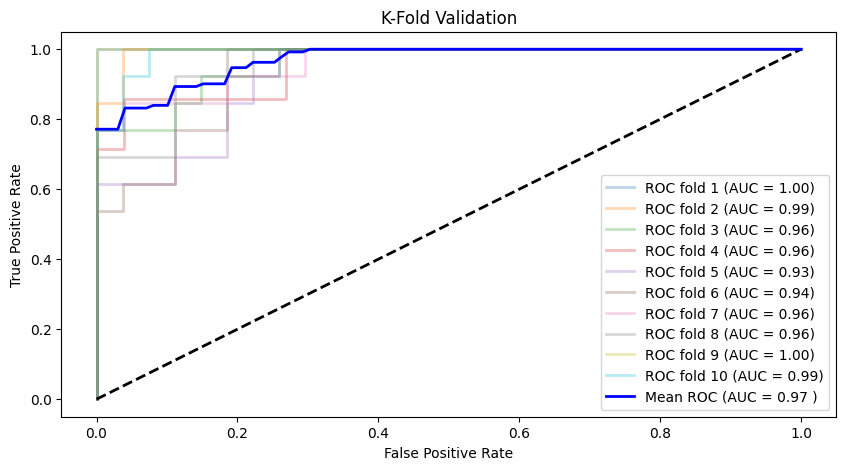

In [76]:
cv = model_selection.StratifiedKFold(n_splits=10, shuffle=True)
tprs, aucs = [], []
mean_fpr = np.linspace(0,1,100)
fig = plt.figure(figsize=(10,5),dpi=100)
i = 1
for train, test in cv.split(X_train, y_train):
    X_train_selected = X_train.iloc[train]

    y_train_selected = y_train.iloc[train]
    X_train_selected_test = X_train.iloc[test]
    y_train_selected_test = y_train.iloc[test]

    prediction = model.fit(X_train_selected, y_train_selected).predict_proba(X_train_selected_test)
    fpr, tpr, t = metrics.roc_curve(y_train_selected_test, prediction[:, 0], pos_label=1)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1

plt.plot([0,1], [0,1], linestyle='--', lw=2, color='black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Fold Validation')
plt.legend(loc="lower right")

plt.show()

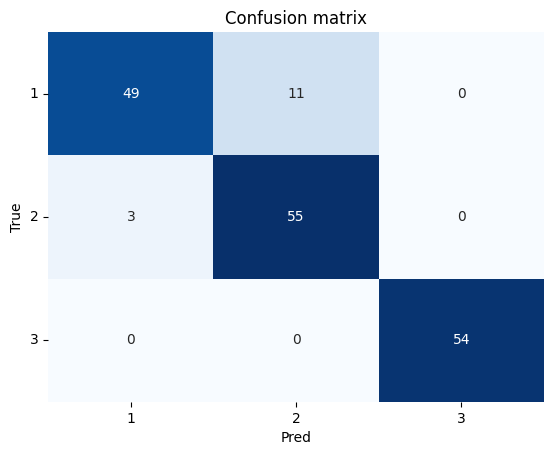

In [77]:
# посмотрим на матрицу ошибок
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
ax.set_xticklabels(labels=classes, rotation=0)

plt.show()

In [78]:
def compute_class(ls_res, class_value): # возвращаем строку имен классов
    y_t_class = ls_res.copy().astype(int)
    y_t_class = y_t_class.apply(lambda c: 1 if c  == class_value  else 0)
    return  y_t_class

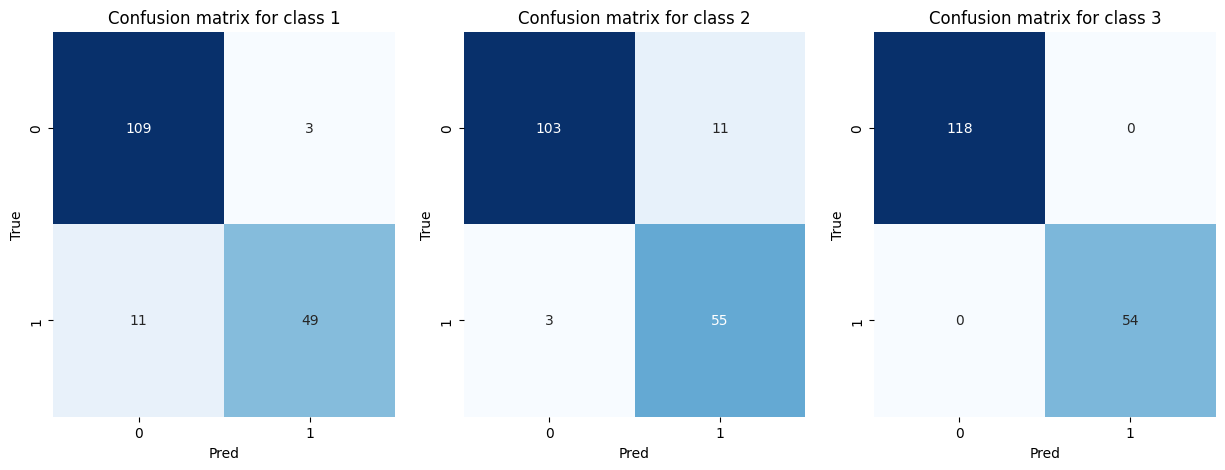

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15,5),dpi=100)

classes = np.unique(y_test).astype(int)

lbs = [1, 2, 3]

# матрица ошибок для каждого класса

for class_i in classes:
    y_one_class = compute_class(y_test,class_i)
    predicted_one_class = compute_class(pd.Series(predicted.tolist()), class_i)  #возвращает строку имен классов
    cm = metrics.confusion_matrix(y_one_class, predicted_one_class)
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False, ax=ax[class_i-1])
    ax[class_i-1].set(xlabel="Pred", ylabel="True", title=f"Confusion matrix for class {class_i}")
plt.show()

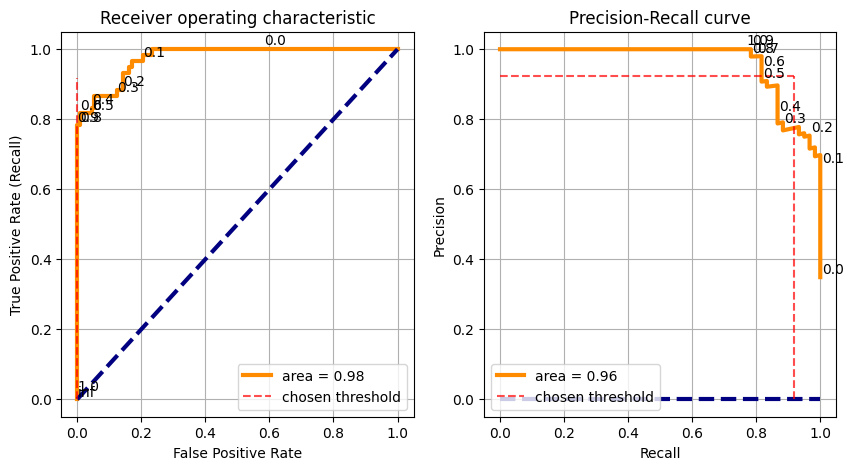

In [81]:

classes = np.unique(y_test)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,5),dpi=100)

fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_prob[:, 0], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
ax[0].plot(fpr, tpr, color='darkorange', lw=3, label='area = %0.2f' % roc_auc)
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].hlines(y=recall, xmin=0, xmax=1-cm[0,0]/(cm[0,0]+cm[0,1]), color='red', linestyle='--', alpha=0.7, label="chosen threshold")
ax[0].vlines(x=1-cm[0,0]/(cm[0,0]+cm[0,1]), ymin=0, ymax=recall, color='red', linestyle='--', alpha=0.7)
ax[0].set(xlabel='False Positive Rate', ylabel="True Positive Rate (Recall)", title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
## annotate ROC thresholds

thres_in_plot = []
for i,t in enumerate(thresholds):
    t = np.round(t,1)
    if t not in thres_in_plot:
        ax[0].annotate(t, xy=(fpr[i],tpr[i]), xytext=(fpr[i],tpr[i]),
                    textcoords='offset points', ha='left', va='bottom')
        thres_in_plot.append(t)
    else:
        next

precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, predicted_prob[:,0], pos_label=1)
roc_auc = metrics.auc(recalls, precisions)
ax[1].plot(recalls, precisions, color='darkorange', lw=3, label='area = %0.2f' % roc_auc)
ax[1].plot([0,1], [(cm[1,0]+cm[1,0])/len(y_test), (cm[1,0]+cm[1,0])/len(y_test)], linestyle='--', color='navy', lw=3)
ax[1].hlines(y=precision, xmin=0, xmax=recall, color='red', linestyle='--', alpha=0.7, label="chosen threshold")
ax[1].vlines(x=recall, ymin=0, ymax=precision, color='red', linestyle='--', alpha=0.7)
ax[1].set(xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="lower left")
ax[1].grid(True)
## annotate P-R thresholds

thres_in_plot = []
for i,t in enumerate(thresholds):
    t = np.round(t,1)
    if t not in thres_in_plot:
        ax[1].annotate(np.round(t,1), xy=(recalls[i],precisions[i]),
                    xytext=(recalls[i],precisions[i]),
                    textcoords='offset points', ha='left', va='bottom')
        thres_in_plot.append(t)
    else:
        next
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

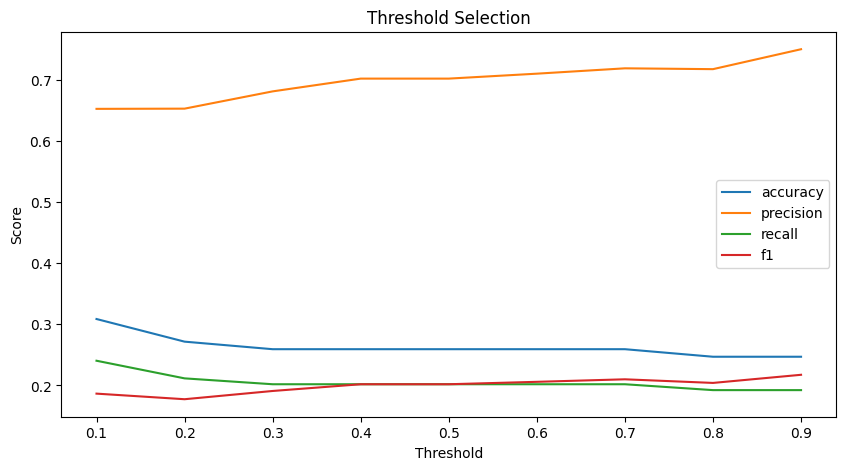

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,5),dpi=100)

dic_scores = {'accuracy':[], 'precision':[], 'recall':[], 'f1':[]}
XX_train, XX_test, yy_train, yy_test = model_selection.train_test_split(X_train, y_train, test_size=0.2)
predicted_prob = model.fit(XX_train, yy_train).predict_proba(XX_test)[:,0]
thresholds = []
for threshold in np.arange(0.1, 1, step=0.1):
    predicted = (predicted_prob > threshold)
    thresholds.append(threshold)
    dic_scores["accuracy"].append(metrics.accuracy_score(yy_test, predicted))
    dic_scores["precision"].append(metrics.precision_score(yy_test, predicted, average='macro', zero_division=1))
    dic_scores["recall"].append(metrics.recall_score(yy_test, predicted, average='macro'))
    dic_scores["f1"].append(metrics.f1_score(yy_test, predicted, average='macro'))

## plot
dtf_scores = pd.DataFrame(dic_scores).set_index(pd.Index(thresholds))
ax.set(xlabel='Threshold', ylabel="Score", title="Threshold Selection")
dtf_scores.plot(ax=ax)

plt.show()